# Impatient charges

## Reading assignment takeaways
- There are multiple types of healthcare fraud including: provider fraud, consumer fraud, insurer/payer fraud
- traditional methods of fraud detection are too slow and costly to be constantly identifying new instantances of fraud and properly classifying fraudlent charges under known schemes
- a combination of both unsupervised and supervised offer the best method of capturing and exceling at what traditional methods do, all while doing so in a faster manner and the ability to uncover emerging schemes as they happen as opposed to after they have already occured 

In [2]:
setwd("C:/Users/rdiml/Documents/")
#setwd("C:/Users/RD45077/Documents/")

In [3]:
install.packages("zipcode")
library(dplyr)
install.packages('DataExplorer')
library(DataExplorer)
#install.packages('xda')
#library(xda)
library(ggplot2)
install.packages('plotly')
library(plotly)
#library(data.table)
library(zipcode)
suppressPackageStartupMessages(library(tidyverse))
library(stringr)
library(ggthemes)
suppressPackageStartupMessages(library(maps))
library(tidyverse)

Installing package into 'C:/Users/rdiml/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'zipcode' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rdiml\AppData\Local\Temp\RtmpYDCRE8\downloaded_packages



Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Installing package into 'C:/Users/rdiml/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'DataExplorer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rdiml\AppData\Local\Temp\RtmpYDCRE8\downloaded_packages


Installing package into 'C:/Users/rdiml/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'plotly' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rdiml\AppData\Local\Temp\RtmpYDCRE8\downloaded_packages



Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout



In [4]:
install.packages('maps')
library(maps)

Installing package into 'C:/Users/rdiml/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'maps' is in use and will not be installed"

In [7]:
med.data <- read.csv(file = "inpatientCharges.csv")

In [26]:
head(med.data)
tail(med.data)

DRG.Definition,Provider.Id,Provider.Name,Provider.Street.Address,Provider.City,Provider.State,Provider.Zip.Code,Hospital.Referral.Region.Description,Total.Discharges,Average.Covered.Charges,Average.Total.Payments,Average.Medicare.Payments
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10023,BAPTIST MEDICAL CENTER SOUTH,2105 EAST SOUTH BOULEVARD,MONTGOMERY,AL,36116,AL - Montgomery,67,$16920.79,$6653.80,$5374.14


,DRG.Definition,Provider.Id,Provider.Name,Provider.Street.Address,Provider.City,Provider.State,Provider.Zip.Code,Hospital.Referral.Region.Description,Total.Discharges,Average.Covered.Charges,Average.Total.Payments,Average.Medicare.Payments
163060,948 - SIGNS & SYMPTOMS W/O MCC,670024,NORTH CYPRESS MEDICAL CENTER,21214 NORTHWEST FREEWAY,CYPRESS,TX,77429,TX - Houston,23,$34774.21,$3772.00,$3085.73
163061,948 - SIGNS & SYMPTOMS W/O MCC,670041,SETON MEDICAL CENTER WILLIAMSON,201 SETON PARKWAY,ROUND ROCK,TX,78664,TX - Austin,23,$26314.39,$3806.86,$3071.39
163062,948 - SIGNS & SYMPTOMS W/O MCC,670055,METHODIST STONE OAK HOSPITAL,1139 E SONTERRA BLVD,SAN ANTONIO,TX,78258,TX - San Antonio,11,$21704.72,$4027.36,$2649.72
163063,948 - SIGNS & SYMPTOMS W/O MCC,670056,SETON MEDICAL CENTER HAYS,6001 KYLE PKWY,KYLE,TX,78640,TX - Austin,19,$39121.73,$5704.36,$4058.36
163064,948 - SIGNS & SYMPTOMS W/O MCC,670060,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,231 SOUTH COLLINS ROAD,SUNNYVALE,TX,75182,TX - Dallas,11,$28873.09,$7663.09,$6848.54
163065,948 - SIGNS & SYMPTOMS W/O MCC,670068,TEXAS HEALTH PRESBYTERIAN HOSPITAL FLOWER MOUND,4400 LONG PRAIRIE ROAD,FLOWER MOUND,TX,75028,TX - Dallas,12,$15042.00,$3539.75,$2887.41


In [27]:
summary(med.data)

                                                                  DRG.Definition  
 194 - SIMPLE PNEUMONIA & PLEURISY W CC                                  :  3023  
 690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC                         :  2989  
 292 - HEART FAILURE & SHOCK W CC                                        :  2953  
 392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC            :  2950  
 641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC:  2899  
 871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC                :  2812  
 (Other)                                                                 :145439  
  Provider.Id                       Provider.Name   
 Min.   : 10001   GOOD SAMARITAN HOSPITAL  :   633  
 1st Qu.:110092   ST JOSEPH MEDICAL CENTER :   427  
 Median :250007   MERCY MEDICAL CENTER     :   357  
 Mean   :255570   MERCY HOSPITAL           :   347  
 3rd Qu.:380075   ST JOSEPH HOSPITAL       :   343  
 Max.   :670077   

Data Dictionary:
- DRG.Definition classification system for similar medical conditions and/or any inpatient services 
- Total discharges is the total number of discharges billed by all providers for inpatient hospital services
- AVG covered costs is the average charge of all provider's services covered by Medicare for discharges in the DRG. These will vary from hospital to hospital because of differences in hospital charge structures
- AVG total payments is the average total payments to all providers for the DRG including the MS-DRG amount, teaching,  disproportionate share, capital, and outlier payments for all cases. Also included in average total payments are co-payment and deductible amounts that the patient is responsible for and any additional payments by third parties for coordination of benefits.
- AVG medicare payments is the average amount that Medicare pays to the provider for Medicare's share of the MS-DRG. Medicare payment amounts include the MS-DRG amount, teaching,  disproportionate share, capital, and outlier payments for all cases. Medicare payments DO NOT include beneficiary co-payments and deductible amounts nor any additional payments from third parties for coordination of benefits

In [107]:
introduce(med.data)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
163065,12,6,6,0,0,163065,1956780,10543416


In [28]:
med.data %>% group_by(Provider.Id) %>% summarise(ct = n()) %>% arrange(desc(ct))

Provider.Id,ct
10092,100
40114,100
50093,100
50625,100
70022,100
80001,100
90011,100
100006,100
100007,100
100012,100


In [29]:
med.data %>% group_by(Provider.State) %>% summarise(ct = n()) %>% arrange(desc(ct))

Provider.State,ct
CA,13064
TX,11864
FL,11155
NY,9178
IL,7909
PA,7804
OH,7012
MI,5419
NC,5041
GA,4968


In [30]:
med.data %>% filter(Provider.State == "CA") %>% group_by(Provider.Id) %>% summarise(ct = n()) %>% arrange(desc(ct))

Provider.Id,ct
50093,100
50625,100
50573,99
50026,98
50077,98
50438,97
50351,91
50238,90
50567,90
50039,89


In [31]:
med.data %>% group_by(DRG.Definition) %>% summarise(ct = n()) %>% arrange(desc(ct))

DRG.Definition,ct
194 - SIMPLE PNEUMONIA & PLEURISY W CC,3023
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,2989
292 - HEART FAILURE & SHOCK W CC,2953
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",2950
"641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC",2899
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,2812
603 - CELLULITIS W/O MCC,2807
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,2750
191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC,2720
190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC,2713


In [32]:
med.data %>% filter(Provider.State == "AL") %>% mutate(avg = mean(Average.Medicare.Payments))

Warning message in mean.default(Average.Medicare.Payments):
"argument is not numeric or logical: returning NA"

DRG.Definition,Provider.Id,Provider.Name,Provider.Street.Address,Provider.City,Provider.State,Provider.Zip.Code,Hospital.Referral.Region.Description,Total.Discharges,Average.Covered.Charges,Average.Total.Payments,Average.Medicare.Payments,avg
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73,NA
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71,NA
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79,NA
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16,NA
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44,NA
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10023,BAPTIST MEDICAL CENTER SOUTH,2105 EAST SOUTH BOULEVARD,MONTGOMERY,AL,36116,AL - Montgomery,67,$16920.79,$6653.80,$5374.14,NA
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,51,$11977.13,$5834.74,$4761.41,NA
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,32,$35841.09,$8031.12,$5858.50,NA
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10039,HUNTSVILLE HOSPITAL,101 SIVLEY RD,HUNTSVILLE,AL,35801,AL - Huntsville,135,$28523.39,$6113.38,$5228.40,NA
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10040,GADSDEN REGIONAL MEDICAL CENTER,1007 GOODYEAR AVENUE,GADSDEN,AL,35903,AL - Birmingham,34,$75233.38,$5541.05,$4386.94,NA


I was trying to get a look at the average for the state but got the NA value returned, I realized that the class type was not numeric and realized I needed to drop the non-numeric characters from the column to perform the function 

In [5]:
install.packages('stringr')
library(stringr)

Installing package into 'C:/Users/rdiml/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'stringr' is in use and will not be installed"

In [5]:
drop.dollar.sign <- function(x) {
    as.numeric(str_replace(x, '\\$', ''))
}

In [8]:
med.data %>% mutate_at(vars(Average.Covered.Charges, Average.Total.Payments,Average.Medicare.Payments), drop.dollar.sign)

DRG.Definition,Provider.Id,Provider.Name,Provider.Street.Address,Provider.City,Provider.State,Provider.Zip.Code,Hospital.Referral.Region.Description,Total.Discharges,Average.Covered.Charges,Average.Total.Payments,Average.Medicare.Payments
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10023,BAPTIST MEDICAL CENTER SOUTH,2105 EAST SOUTH BOULEVARD,MONTGOMERY,AL,36116,AL - Montgomery,67,16920.79,6653.80,5374.14
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,51,11977.13,5834.74,4761.41
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,32,35841.09,8031.12,5858.50
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10039,HUNTSVILLE HOSPITAL,101 SIVLEY RD,HUNTSVILLE,AL,35801,AL - Huntsville,135,28523.39,6113.38,5228.40
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10040,GADSDEN REGIONAL MEDICAL CENTER,1007 GOODYEAR AVENUE,GADSDEN,AL,35903,AL - Birmingham,34,75233.38,5541.05,4386.94


In [36]:
med.data %>% filter(Provider.State == "AL") %>% mutate(avg = mean(Average.Medicare.Payments))

Warning message in mean.default(Average.Medicare.Payments):
"argument is not numeric or logical: returning NA"

DRG.Definition,Provider.Id,Provider.Name,Provider.Street.Address,Provider.City,Provider.State,Provider.Zip.Code,Hospital.Referral.Region.Description,Total.Discharges,Average.Covered.Charges,Average.Total.Payments,Average.Medicare.Payments,avg
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73,NA
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71,NA
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79,NA
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16,NA
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44,NA
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10023,BAPTIST MEDICAL CENTER SOUTH,2105 EAST SOUTH BOULEVARD,MONTGOMERY,AL,36116,AL - Montgomery,67,$16920.79,$6653.80,$5374.14,NA
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,51,$11977.13,$5834.74,$4761.41,NA
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,32,$35841.09,$8031.12,$5858.50,NA
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10039,HUNTSVILLE HOSPITAL,101 SIVLEY RD,HUNTSVILLE,AL,35801,AL - Huntsville,135,$28523.39,$6113.38,$5228.40,NA
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10040,GADSDEN REGIONAL MEDICAL CENTER,1007 GOODYEAR AVENUE,GADSDEN,AL,35903,AL - Birmingham,34,$75233.38,$5541.05,$4386.94,NA


In [28]:
class(med.data$Average.Medicare.Payments)

[1] "factor"

In [9]:
#need to convert class type of numeric columns
med.data$Average.Medicare.Payments <- as.numeric(med.data$Average.Medicare.Payments)
class(med.data$Average.Medicare.Payments)
med.data$Average.Covered.Charges <- as.numeric(med.data$Average.Covered.Charges)
class(med.data$Average.Covered.Charges)
med.data$Average.Total.Payments <- as.numeric(med.data$Average.Total.Payments)
class(med.data$Average.Total.Payments)

[1] "numeric"

[1] "numeric"

[1] "numeric"

In [9]:
med.data %>% filter(Provider.State == "AL") %>% mutate(avg = mean(Total.Discharges))

DRG.Definition,Provider.Id,Provider.Name,Provider.Street.Address,Provider.City,Provider.State,Provider.Zip.Code,Hospital.Referral.Region.Description,Total.Discharges,Average.Covered.Charges,Average.Total.Payments,Average.Medicare.Payments,avg
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,97796,93930,86548,39.25832
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,29994,94141,90839,39.25832
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,107397,87284,80274,39.25832
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,23460,86948,73754,39.25832
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,94605,91606,88332,39.25832
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10023,BAPTIST MEDICAL CENTER SOUTH,2105 EAST SOUTH BOULEVARD,MONTGOMERY,AL,36116,AL - Montgomery,67,39942,110289,98755,39.25832
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,51,11502,95031,86502,39.25832
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,32,104040,129770,107455,39.25832
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10039,HUNTSVILLE HOSPITAL,101 SIVLEY RD,HUNTSVILLE,AL,35801,AL - Huntsville,135,86419,100393,95873,39.25832
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10040,GADSDEN REGIONAL MEDICAL CENTER,1007 GOODYEAR AVENUE,GADSDEN,AL,35903,AL - Birmingham,34,145812,89333,78913,39.25832


In [10]:
sum.procedures <- med.data %>% 
select(DRG.Definition, Provider.Id, Total.Discharges, Average.Covered.Charges, Average.Total.Payments, Average.Medicare.Payments) %>%
group_by(DRG.Definition) %>% 
summarise(discharge.total = sum(Total.Discharges), AVG.Covered.Charges=mean(Average.Covered.Charges), AVG.Medicare.Payments=mean(Average.Medicare.Payments), AVG.Total.Payments=mean(Average.Total.Payments)) %>% 
arrange(desc(discharge.total))%>%
top_n(10,discharge.total)

sum.procedures

DRG.Definition,discharge.total,AVG.Covered.Charges,AVG.Medicare.Payments,AVG.Total.Payments
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,427207,111498.70,32517.93,23687.93
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,319072,98293.22,44507.61,24650.21
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",244854,63943.76,67372.61,77080.99
292 - HEART FAILURE & SHOCK W CC,222038,67686.74,102183.82,102150.17
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,206695,64138.00,76657.83,81747.55
194 - SIMPLE PNEUMONIA & PLEURISY W CC,198390,68641.59,99058.54,102960.45
291 - HEART FAILURE & SHOCK W MCC,185599,86861.95,102937.63,89767.40
"641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC",153660,67657.34,65223.54,72260.81
683 - RENAL FAILURE W CC,150444,69023.33,100797.73,102086.49
190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC,149677,75012.01,107888.17,107590.95


In [11]:
install.packages('ggplot2')
library(ggplot2)
install.packages('reshape2')
library(reshape2)
install.packages('d3heatmap')
library(d3heatmap)

Installing package into 'C:/Users/rdiml/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'ggplot2' is in use and will not be installed"Installing package into 'C:/Users/rdiml/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'reshape2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rdiml\AppData\Local\Temp\RtmpYDCRE8\downloaded_packages



Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths

Installing package into 'C:/Users/rdiml/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'd3heatmap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rdiml\AppData\Local\Temp\RtmpYDCRE8\downloaded_packages


Using DRG.Definition as id variables


Observations: 30
Variables: 3
$ DRG.Definition <fct> "470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LO...
$ variable       <fct> AVG.Covered.Charges, AVG.Covered.Charges, AVG.Covere...
$ value          <dbl> 111498.70, 98293.22, 63943.76, 67686.74, 64138.00, 6...


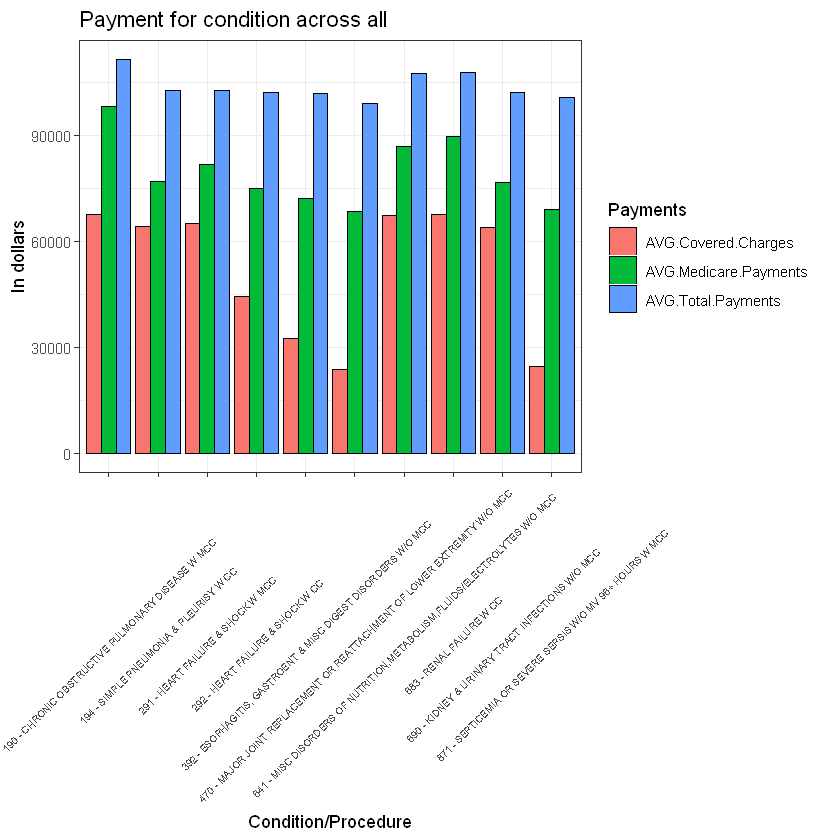

In [12]:
plot.data <- sum.procedures %>%
select(DRG.Definition,AVG.Covered.Charges,AVG.Medicare.Payments,AVG.Total.Payments) %>% melt()
glimpse(plot.data)

ggplot(data=plot.data, aes(x=DRG.Definition, y=sort(value), fill=variable)) +
geom_bar(colour = "black", stat="identity",
        position = position_dodge(), 
        size = 0.3) +
scale_fill_hue(name="Payments") + 
xlab("Condition/Procedure") + ylab("In dollars") +
ggtitle("Payment for condition across all") + 
theme_bw()+
theme(axis.text.x = element_text(angle=45, vjust=0.5, size=6))
 

The below code works, but it is not compatible with R 3.6.1 so need to run it on personal device to get it to work 

In [45]:
plot_ly(x = sum.procedures$DRG.Definition,
       y = sum.procedures$procedure.total,
       type="bar"%>%
        layout(xaxis = 'Type of Procedure', yaxis = 'Procedure Frequency',
              title = "Total Procedure Count")
       )

ERROR: Error in plotly(x = sum.procedures$DRG.Definition, y = sum.procedures$procedure.total, : could not find function "plotly"


In [11]:
library(tidyverse)

## Recoding state/territory into integer alias

I wanted to create a heatmap visual using the Provider.State as the row index, but I couldn't use the character class feature to do it. So I created an index ID column 

In [109]:
table(med.data$Provider.State)


   AK    AL    AR    AZ    CA    CO    CT    DC    DE    FL    GA    HI    IA 
  231  3635  2067  2851 13064  1890  2011   462   394 11155  4968   442  1734 
   ID    IL    IN    KS    KY    LA    MA    MD    ME    MI    MN    MO    MS 
  551  7909  4260  1638  3229  3027  3842  3330   888  5419  2252  4059  2410 
   MT    NC    ND    NE    NH    NJ    NM    NV    NY    OH    OK    OR    PA 
  506  5041   422  1062   823  4826   917  1202  9178  7012  2520  1299  7804 
   RI    SC    SD    TN    TX    UT    VA    VT    WA    WI    WV    WY 
  588  2847   486  4168 11864   732  4332   270  2778  2834  1589   247 

In [13]:
med.data1 <- med.data %>%
mutate(state.id = case_when(
Provider.State == "AK" ~ 1, Provider.State == "AL" ~ 2, Provider.State == "AR" ~ 3, Provider.State == "AZ" ~ 4,
Provider.State == "CA" ~ 5, Provider.State == "CO" ~ 6, Provider.State == "CT" ~ 7, Provider.State == "DC" ~ 8,
Provider.State == "DE" ~ 9, Provider.State == "FL" ~ 10, Provider.State == "GA" ~ 11, Provider.State == "HI" ~ 12,
Provider.State == "IA" ~ 13, Provider.State == "ID" ~ 14, Provider.State == "IL" ~ 15, Provider.State == "IN" ~ 16,
Provider.State == "KS" ~ 17, Provider.State == "KY" ~ 18, Provider.State == "LA" ~ 19, Provider.State == "MA" ~ 20,
Provider.State == "MD" ~ 21, Provider.State == "ME" ~ 22, Provider.State == "MI" ~ 23, Provider.State == "MN" ~ 24,
Provider.State == "MO" ~ 25, Provider.State == "MS" ~ 26, Provider.State == "MT" ~ 27, Provider.State == "NC" ~ 28, 
Provider.State == "ND" ~ 29, Provider.State == "NE" ~ 30, Provider.State == "NH" ~ 31, Provider.State == "NJ" ~ 32, 
Provider.State == "NM" ~ 33, Provider.State == "NV" ~ 34, Provider.State == "NY" ~ 35, Provider.State == "OH" ~ 36,
Provider.State == "OK" ~ 37, Provider.State == "OR" ~ 38, Provider.State == "PA" ~ 39, Provider.State == "RI" ~ 40,
Provider.State == "SC" ~ 41, Provider.State == "SD" ~ 42, Provider.State == "TN" ~ 43, Provider.State == "TX" ~ 44, 
Provider.State == "UT" ~ 45, Provider.State == "VA" ~ 46, Provider.State == "VT" ~ 47, Provider.State == "WA" ~ 48, 
Provider.State == "WI" ~ 49, Provider.State == "WV" ~ 50, Provider.State == "WY" ~ 51))
#med.data1 %>%
#remove_rownames() %>%
#column_to_rownames(var = 'Provider.State')
head(med.data1)

DRG.Definition,Provider.Id,Provider.Name,Provider.Street.Address,Provider.City,Provider.State,Provider.Zip.Code,Hospital.Referral.Region.Description,Total.Discharges,Average.Covered.Charges,Average.Total.Payments,Average.Medicare.Payments,state.id
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,97796,93930,86548,2
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,29994,94141,90839,2
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,107397,87284,80274,2
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,23460,86948,73754,2
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,94605,91606,88332,2
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10023,BAPTIST MEDICAL CENTER SOUTH,2105 EAST SOUTH BOULEVARD,MONTGOMERY,AL,36116,AL - Montgomery,67,39942,110289,98755,2


In [14]:
med.data1 <- med.data1 %>%
group_by(Provider.State) %>%
mutate(state.avg.discharges = mean(Total.Discharges))

In [15]:
#how far above or below is a given hospital in terms of total discharges versus the state average 
med.data1 <- med.data1 %>%
group_by(Provider.State) %>%
mutate(count.above.below.mean = (Total.Discharges - state.avg.discharges))
med.data1

DRG.Definition,Provider.Id,Provider.Name,Provider.Street.Address,Provider.City,Provider.State,Provider.Zip.Code,Hospital.Referral.Region.Description,Total.Discharges,Average.Covered.Charges,Average.Total.Payments,Average.Medicare.Payments,state.id,state.avg.discharges,count.above.below.mean
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,97796,93930,86548,2,39.25832,51.741678
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,29994,94141,90839,2,39.25832,-25.258322
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,107397,87284,80274,2,39.25832,-15.258322
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,23460,86948,73754,2,39.25832,-14.258322
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,94605,91606,88332,2,39.25832,-21.258322
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10023,BAPTIST MEDICAL CENTER SOUTH,2105 EAST SOUTH BOULEVARD,MONTGOMERY,AL,36116,AL - Montgomery,67,39942,110289,98755,2,39.25832,27.741678
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,51,11502,95031,86502,2,39.25832,11.741678
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,32,104040,129770,107455,2,39.25832,-7.258322
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10039,HUNTSVILLE HOSPITAL,101 SIVLEY RD,HUNTSVILLE,AL,35801,AL - Huntsville,135,86419,100393,95873,2,39.25832,95.741678
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10040,GADSDEN REGIONAL MEDICAL CENTER,1007 GOODYEAR AVENUE,GADSDEN,AL,35903,AL - Birmingham,34,145812,89333,78913,2,39.25832,-5.258322


After creating a column to find how many more discharges there were above and below the given state average, I wanted to investigate the states with highest frequency in the dataset. The top 5 states were CA, TX, FL, NY, and IL. So I took the top states and grouped them by the hospital providers to see which ones had the greatest disparity between their discharges and the statewide average.  

In [16]:
med.data1 %>%
filter(Provider.State == "CA") %>%
select(Provider.State, Provider.Name, Total.Discharges, state.avg.discharges, count.above.below.mean) %>%
arrange(desc(count.above.below.mean))

Provider.State,Provider.Name,Total.Discharges,state.avg.discharges,count.above.below.mean
CA,PARADISE VALLEY HOSPITAL,1696,36.35785,1659.6421
CA,HOLLYWOOD COMMUNITY HOSPITAL OF HOLLYWOOD,1050,36.35785,1013.6421
CA,SAINT JOHN'S HEALTH CENTER,922,36.35785,885.6421
CA,MISSION COMMUNITY HOSPITAL - PANORAMA,883,36.35785,846.6421
CA,HOAG ORTHOPEDIC INSTITUTE,878,36.35785,841.6421
CA,SILVER LAKE MEDICAL CENTER,863,36.35785,826.6421
CA,PACIFIC HOSPITAL OF LONG BEACH,818,36.35785,781.6421
CA,CEDARS-SINAI MEDICAL CENTER,738,36.35785,701.6421
CA,MERCY SAN JUAN MEDICAL CENTER,645,36.35785,608.6421
CA,ST HELENA HOSPITAL,632,36.35785,595.6421


In [149]:
med.data1 %>%
filter(Provider.State == "CA" & Total.Discharges <= 15) %>%
select(Provider.State, Provider.Name, Total.Discharges, state.avg.discharges, count.above.below.mean) %>%
arrange(desc(count.above.below.mean))

Provider.State,Provider.Name,Total.Discharges,state.avg.discharges,count.above.below.mean
CA,ANTELOPE VALLEY HOSPITAL MED CENTER,15,36.35785,-21.35785
CA,EMANUEL MEDICAL CENTER INC,15,36.35785,-21.35785
CA,ALVARADO HOSPITAL MEDICAL CENTER,15,36.35785,-21.35785
CA,RIDEOUT MEMORIAL HOSPITAL,15,36.35785,-21.35785
CA,PALMDALE REGIONAL MEDICAL CENTER,15,36.35785,-21.35785
CA,HOAG MEMORIAL HOSPITAL PRESBYTERIAN,15,36.35785,-21.35785
CA,UNIVERSITY OF CALIFORNIA IRVINE MED CENTER,15,36.35785,-21.35785
CA,UCSF MEDICAL CENTER,15,36.35785,-21.35785
CA,ANTELOPE VALLEY HOSPITAL MED CENTER,15,36.35785,-21.35785
CA,ALHAMBRA HOSPITAL MEDICAL CENTER,15,36.35785,-21.35785


In [119]:
drg.state <- med.data1 %>%
select(state.id,Provider.State, DRG.Definition)

## Geocoding/density map

visualizing frequency of cases across the country, trying to identify areas 

In [151]:
class(med.data1$Provider.Zip.Code)

[1] "integer"

In [17]:
data(zipcode)

In [18]:
#using clean.zipcodes function to clean the column before plotting the map
med.data1$Provider.Zip.Code <- clean.zipcodes(med.data1$Provider.Zip.Code)

In [19]:
#creating object to store map df 
med.zip <- aggregate(data.frame(count=med.data1$Provider.Id), list(zip=med.data1$Provider.Zip.Code), length)
map.test <- merge(med.zip, zipcode, by='zip')
u.s. <- map_data('state')

Warning message:
"Removed 20 rows containing missing values (geom_point)."

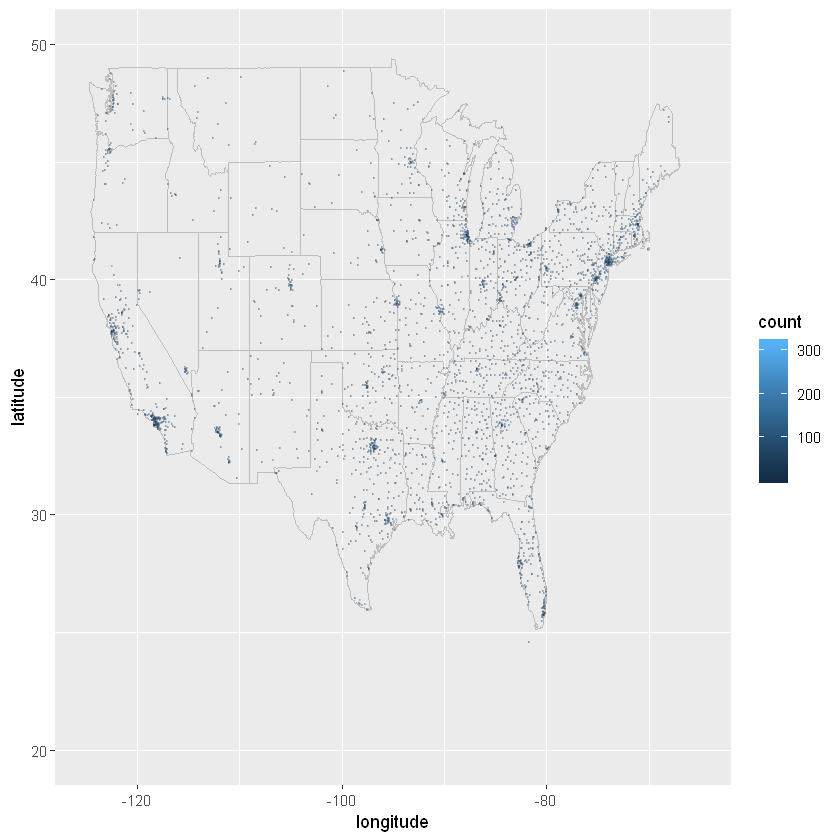

In [20]:
ggplot(map.test, aes(longitude,latitude)) +
geom_polygon(data=u.s., aes(x=long,y=lat,group=group), color='gray',fill=NA,alpha=.35)+
geom_point(aes(color=count),size=0.15,alpha=0.25)+
xlim(-125,-65)+ylim(20,50)

based on earlier observations its not surprising to see higher density in the most frequently appearing states such as CA/TX/IL/NY, however, it looks like there are some high density areas as well for states that are outside the top5 states in the state (top5 by frequency of Provider.State in the dataset)

In [22]:
top.cond <- med.data1 %>%
filter(DRG.Definition == '194 - SIMPLE PNEUMONIA & PLEURISY W CC')
head(top.cond)

DRG.Definition,Provider.Id,Provider.Name,Provider.Street.Address,Provider.City,Provider.State,Provider.Zip.Code,Hospital.Referral.Region.Description,Total.Discharges,Average.Covered.Charges,Average.Total.Payments,Average.Medicare.Payments,state.id,state.avg.discharges,count.above.below.mean
194 - SIMPLE PNEUMONIA & PLEURISY W CC,50242,DOMINICAN HOSPITAL,1555 SOQUEL DRIVE,SANTA CRUZ,CA,95065,CA - Santa Cruz,96,135326,141193,135528,5,36.35785,59.64215
194 - SIMPLE PNEUMONIA & PLEURISY W CC,70027,MANCHESTER MEMORIAL HOSPITAL,71 HAYNES ST,MANCHESTER,CT,06040,CT - Hartford,69,38926,109031,103049,7,47.86574,21.13426
194 - SIMPLE PNEUMONIA & PLEURISY W CC,100061,MERCY HOSPITAL INC,3663 S MIAMI AVE,MIAMI,FL,33133,FL - Miami,32,98854,121870,115838,10,48.12721,-16.12721
194 - SIMPLE PNEUMONIA & PLEURISY W CC,100062,MUNROE REGIONAL MEDICAL CENTER,1500 SW 1ST AVE,OCALA,FL,34474,FL - Ocala,96,78236,86988,82094,10,48.12721,47.87279
194 - SIMPLE PNEUMONIA & PLEURISY W CC,100181,LARKIN COMMUNITY HOSPITAL,7031 SW 62ND AVE,SOUTH MIAMI,FL,33143,FL - Miami,74,111609,132954,129511,10,48.12721,25.87279
194 - SIMPLE PNEUMONIA & PLEURISY W CC,100183,CORAL GABLES HOSPITAL,3100 DOUGLAS RD,CORAL GABLES,FL,33134,FL - Miami,35,145186,132092,124040,10,48.12721,-13.12721


Warning message:
"Removed 18 rows containing missing values (geom_point)."

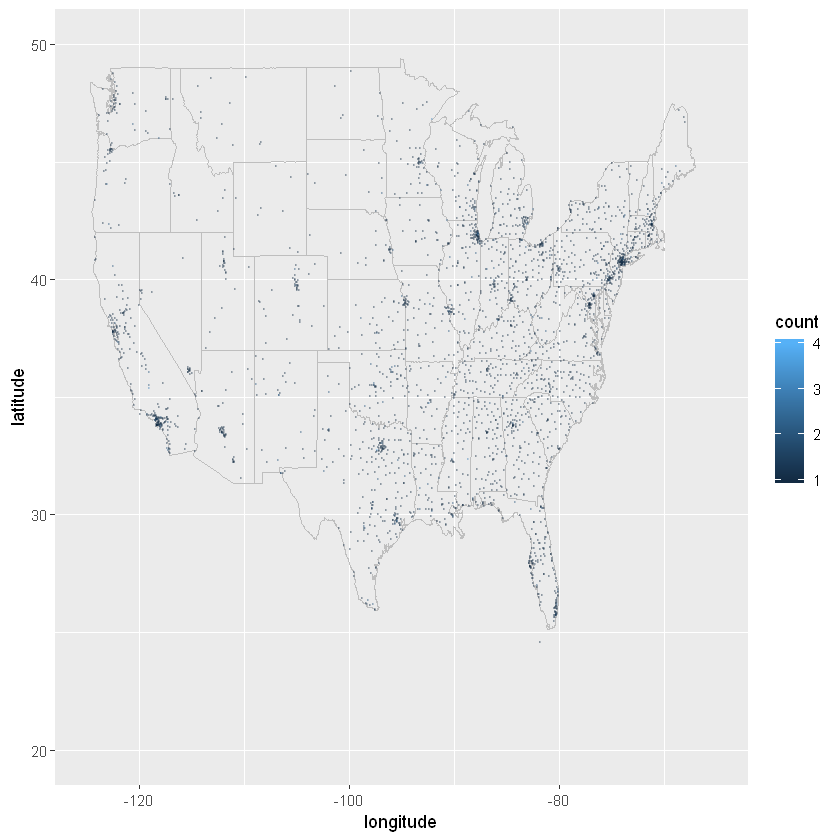

In [23]:
top.cond.zip <- aggregate(data.frame(count=top.cond$Provider.Id), list(zip=top.cond$Provider.Zip.Code), length)
top.cond.map <- merge(top.cond.zip, zipcode, by='zip')
ggplot(top.cond.map, aes(longitude,latitude)) +
geom_polygon(data=u.s., aes(x=long,y=lat,group=group), color='gray',fill=NA,alpha=.35)+
geom_point(aes(color=count),size=0.15,alpha=0.25)+
xlim(-125,-65)+ylim(20,50)

In [24]:
med.data1$DRG.Definition.copy <- med.data1$DRG.Definition

In [25]:
#I wanted to perseve the original DRG.Definition so I created a copy to split the information into code and name
med.data1 <- separate(data=med.data1, col=DRG.Definition.copy, into = c("cond.code", "cond.name"), sep = "\\-")
head(med.data1)

Warning message:
"Expected 2 pieces. Additional pieces discarded in 3280 rows [45894, 45895, 45896, 45897, 45898, 45899, 45900, 45901, 45902, 45903, 45904, 45905, 45906, 45907, 45908, 45909, 45910, 45911, 45912, 45913, ...]."

DRG.Definition,Provider.Id,Provider.Name,Provider.Street.Address,Provider.City,Provider.State,Provider.Zip.Code,Hospital.Referral.Region.Description,Total.Discharges,Average.Covered.Charges,Average.Total.Payments,Average.Medicare.Payments,state.id,state.avg.discharges,count.above.below.mean,cond.code,cond.name
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,97796,93930,86548,2,39.25832,51.74168,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,29994,94141,90839,2,39.25832,-25.25832,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,107397,87284,80274,2,39.25832,-15.25832,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,23460,86948,73754,2,39.25832,-14.25832,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,94605,91606,88332,2,39.25832,-21.25832,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10023,BAPTIST MEDICAL CENTER SOUTH,2105 EAST SOUTH BOULEVARD,MONTGOMERY,AL,36116,AL - Montgomery,67,39942,110289,98755,2,39.25832,27.74168,039,EXTRACRANIAL PROCEDURES W/O CC/MCC


feature ideas:
- what is the highest/lowest avg total payment for the top DRG.Definitions; how does it relate to the countrywide avg (2)
- more specifically, what is the avg cost of treatment (3)
- are there referral locations constantly referring for the same conditions to the same providers; ratio of it (1)
- count of discharges for top n conditions, if we assume 5 then (5)  
- the avg cost of the same treatment at the same hosptial or provider (1)


In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

In [27]:
table(med.data1$DRG.Definition)

Warning message:
"Unknown or uninitialised column: 'DRG.Definition'."

< table of extent 0 >

## Average total payments by condition and provider state

In [27]:
#creating column to capture the average total payment by matching on condition and provider state to have accurate comparasion
med.data1 <- med.data1 %>% 
group_by(DRG.Definition, Provider.State) %>%
mutate(avg.total.cost.by.drg.state = mean(Average.Total.Payments))
med.data1

DRG.Definition,Provider.Id,Provider.Name,Provider.Street.Address,Provider.City,Provider.State,Provider.Zip.Code,Hospital.Referral.Region.Description,Total.Discharges,Average.Covered.Charges,Average.Total.Payments,Average.Medicare.Payments,state.id,state.avg.discharges,count.above.below.mean,cond.code,cond.name,avg.total.cost.by.drg.state
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,97796,93930,86548,2,39.25832,51.741678,039,EXTRACRANIAL PROCEDURES W/O CC/MCC,92878.43
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,29994,94141,90839,2,39.25832,-25.258322,039,EXTRACRANIAL PROCEDURES W/O CC/MCC,92878.43
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,107397,87284,80274,2,39.25832,-15.258322,039,EXTRACRANIAL PROCEDURES W/O CC/MCC,92878.43
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,23460,86948,73754,2,39.25832,-14.258322,039,EXTRACRANIAL PROCEDURES W/O CC/MCC,92878.43
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,94605,91606,88332,2,39.25832,-21.258322,039,EXTRACRANIAL PROCEDURES W/O CC/MCC,92878.43
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10023,BAPTIST MEDICAL CENTER SOUTH,2105 EAST SOUTH BOULEVARD,MONTGOMERY,AL,36116,AL - Montgomery,67,39942,110289,98755,2,39.25832,27.741678,039,EXTRACRANIAL PROCEDURES W/O CC/MCC,92878.43
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,51,11502,95031,86502,2,39.25832,11.741678,039,EXTRACRANIAL PROCEDURES W/O CC/MCC,92878.43
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,32,104040,129770,107455,2,39.25832,-7.258322,039,EXTRACRANIAL PROCEDURES W/O CC/MCC,92878.43
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10039,HUNTSVILLE HOSPITAL,101 SIVLEY RD,HUNTSVILLE,AL,35801,AL - Huntsville,135,86419,100393,95873,2,39.25832,95.741678,039,EXTRACRANIAL PROCEDURES W/O CC/MCC,92878.43
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10040,GADSDEN REGIONAL MEDICAL CENTER,1007 GOODYEAR AVENUE,GADSDEN,AL,35903,AL - Birmingham,34,145812,89333,78913,2,39.25832,-5.258322,039,EXTRACRANIAL PROCEDURES W/O CC/MCC,92878.43


## Subsetting the rows by the conditions among the top 20 in total discharges 

In [29]:
#getting a look at the top 20 conditions by total discharges 
top.drg.subset <- med.data1 %>%
group_by(DRG.Definition) %>%
summarise(total.discharges = sum(Total.Discharges))%>%
arrange(desc(total.discharges))%>%
top_n(20, total.discharges)
top.drg.subset

DRG.Definition,total.discharges
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,427207
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,319072
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",244854
292 - HEART FAILURE & SHOCK W CC,222038
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,206695
194 - SIMPLE PNEUMONIA & PLEURISY W CC,198390
291 - HEART FAILURE & SHOCK W MCC,185599
"641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC",153660
683 - RENAL FAILURE W CC,150444
190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC,149677


In [31]:
Preppin
top20.drg <- med.data1 %>%
filter(DRG.Definition == '470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC' |
       DRG.Definition == '871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC' |
       DRG.Definition == '392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC' |
       DRG.Definition == '292 - HEART FAILURE & SHOCK W CC' |
       DRG.Definition == '690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC' |
       DRG.Definition == '194 - SIMPLE PNEUMONIA & PLEURISY W CC' | 
       DRG.Definition == '291 - HEART FAILURE & SHOCK W MCC' |
       DRG.Definition == '641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC' |
       DRG.Definition == '683 - RENAL FAILURE W CC' |
       DRG.Definition == '190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC' |
       DRG.Definition == '191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC' |
       DRG.Definition == '312 - SYNCOPE & COLLAPSE' |
       DRG.Definition == '603 - CELLULITIS W/O MCC' |
       DRG.Definition == '378 - G.I. HEMORRHAGE W CC' |
       DRG.Definition == '313 - CHEST PAIN' |
       DRG.Definition == '193 - SIMPLE PNEUMONIA & PLEURISY W MCC' |
       DRG.Definition == '287 - CIRCULATORY DISORDERS EXCEPT AMI, W CARD CATH W/O MCC' |
       DRG.Definition == '192 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W/O CC/MCC' |
       DRG.Definition == '310 - CARDIAC ARRHYTHMIA & CONDUCTION DISORDERS W/O CC/MCC' |
       DRG.Definition == '872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W/O MCC')
top20.drg

DRG.Definition,Provider.Id,Provider.Name,Provider.Street.Address,Provider.City,Provider.State,Provider.Zip.Code,Hospital.Referral.Region.Description,Total.Discharges,Average.Covered.Charges,Average.Total.Payments,Average.Medicare.Payments,state.id,state.avg.discharges,count.above.below.mean,cond.code,cond.name,avg.total.cost.by.drg.state
190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC,100053,HIALEAH HOSPITAL,651 E 25TH ST,HIALEAH,FL,33013,FL - Miami,48,145010,3911,147724,10,48.12721,-0.1272075,190,CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC,112028.76
191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC,220080,HOLY FAMILY HOSPITAL,70 EAST STREET,METHUEN,MA,01844,MA - Boston,49,4084,109818,106418,20,50.41124,-1.4112441,191,CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC,109676.54
191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC,330004,KINGSTON HOSPITAL,396 BROADWAY,KINGSTON,NY,12401,NY - Albany,61,74737,117807,115430,35,47.45664,13.5433646,191,CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC,89079.58
191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC,350015,MEDCENTER ONE,300 N 7TH ST,BISMARCK,ND,58506,ND - Bismarck,27,158736,100259,92954,29,38.92180,-11.9218009,191,CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC,99271.50
191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC,450188,ETMC CLARKSVILLE,3000 W MAIN ST,CLARKSVILLE,TX,75426,TX - Dallas,13,78365,87191,78717,44,40.45339,-27.4533884,191,CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC,100429.12
193 - SIMPLE PNEUMONIA & PLEURISY W MCC,100007,FLORIDA HOSPITAL,601 E ROLLINS ST,ORLANDO,FL,32803,FL - Orlando,309,132103,6298,139982,10,48.12721,260.8727925,193,SIMPLE PNEUMONIA & PLEURISY W MCC,104404.57
193 - SIMPLE PNEUMONIA & PLEURISY W MCC,100053,HIALEAH HOSPITAL,651 E 25TH ST,HIALEAH,FL,33013,FL - Miami,34,151514,18888,13494,10,48.12721,-14.1272075,193,SIMPLE PNEUMONIA & PLEURISY W MCC,104404.57
193 - SIMPLE PNEUMONIA & PLEURISY W MCC,100054,TWIN CITIES HOSPITAL,2190 HWY 85 N,NICEVILLE,FL,32578,FL - Pensacola,20,141993,120652,118603,10,48.12721,-28.1272075,193,SIMPLE PNEUMONIA & PLEURISY W MCC,104404.57
193 - SIMPLE PNEUMONIA & PLEURISY W MCC,100252,RAULERSON HOSPITAL,1796 HWY 441 NORTH,OKEECHOBEE,FL,34972,FL - Orlando,26,115991,449,134404,10,48.12721,-22.1272075,193,SIMPLE PNEUMONIA & PLEURISY W MCC,104404.57
193 - SIMPLE PNEUMONIA & PLEURISY W MCC,110001,HAMILTON MEDICAL CENTER,1200 MEMORIAL DRIVE,DALTON,GA,30720,GA - Atlanta,137,88075,134744,131196,11,38.49477,98.5052335,193,SIMPLE PNEUMONIA & PLEURISY W MCC,110931.04


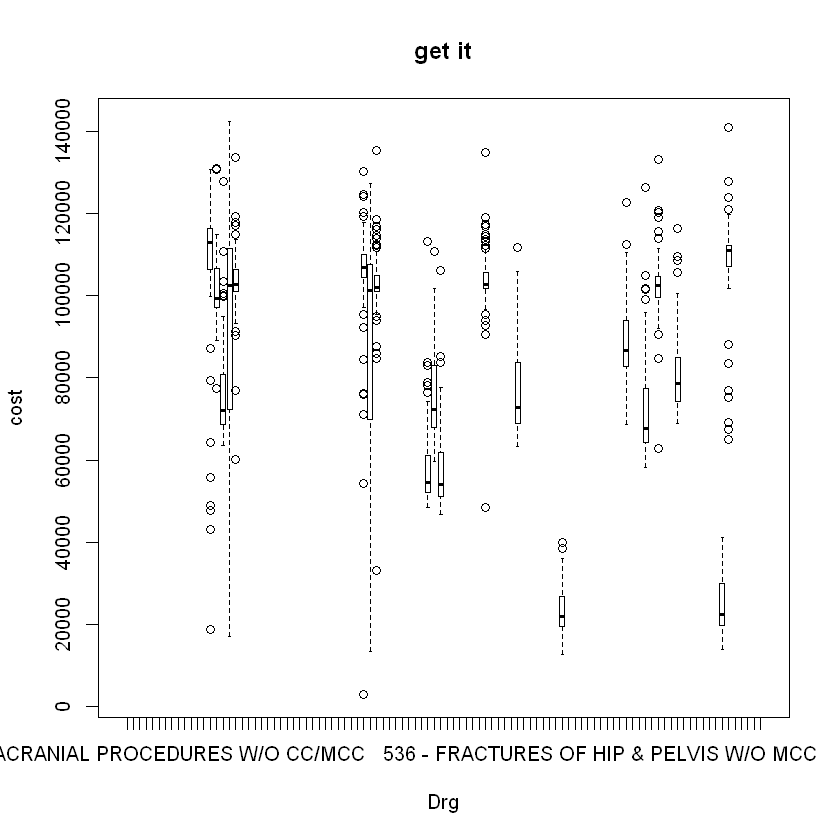

In [33]:
#box plot for all of the conditions and the range of cost 
boxplot(avg.total.cost.by.drg.state~DRG.Definition, data=top20.drg, main="get it", xlab="Drg", ylab="cost")

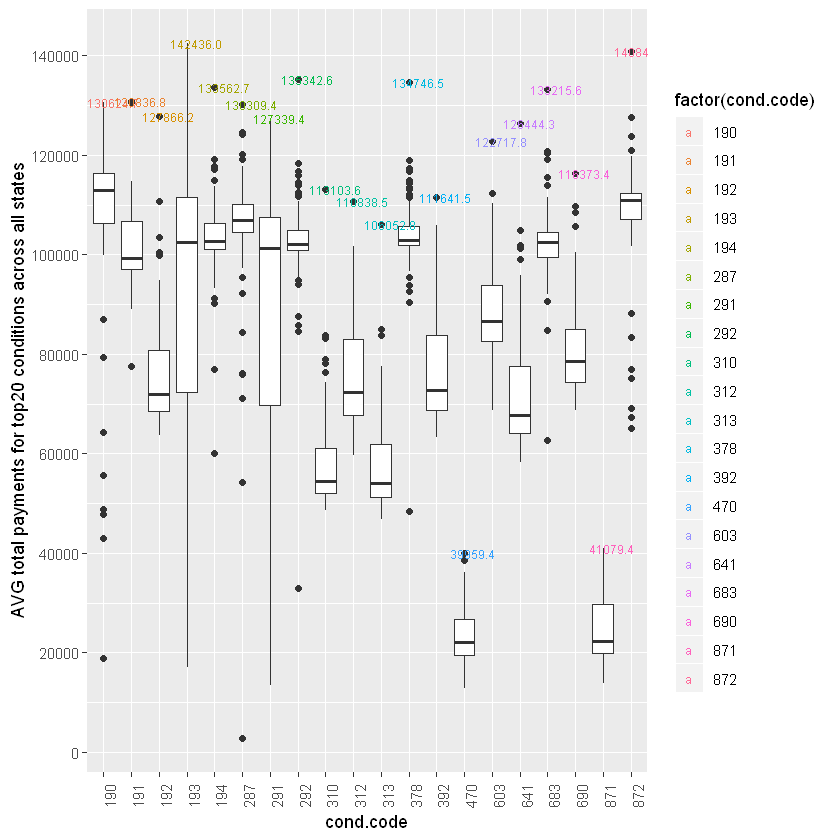

In [46]:
ggplot(top20.drg, aes(x=cond.code, y=avg.total.cost.by.drg.state)) +
geom_boxplot() + 
scale_y_continuous(name = "AVG total payments for top20 conditions across all states",
                  breaks = seq(0, 450000, 20000)) +
theme(axis.text.x = element_text(angle = 90, hjust =1))+
stat_summary(geom="text", fun.y="max",
            aes(label=sprintf("%1.1f",..y..), color=factor(cond.code)),
            position=position_nudge(x=0.33), size=2.5)

Observations regarding the AVG total payments across all states:
- The conditions with the highest frequeny 470/871 (Major joint replacement/septicema) have the lowest mean total payment amounts 
- The conditions with the highest variance in mean total payments were 193 (pneumonia), 287 (circulatory issues), and 291 (heart failure):
    - Pneumonia had a min. total payment of 16,977.70 and a max total payment of 142,436.00
    - Circulatory had a min total payment of 2897.00 and max total payment of 130,309.40
    - Heart failure had a min total payment of 13,397.70 and a max total payment of 127,339.40

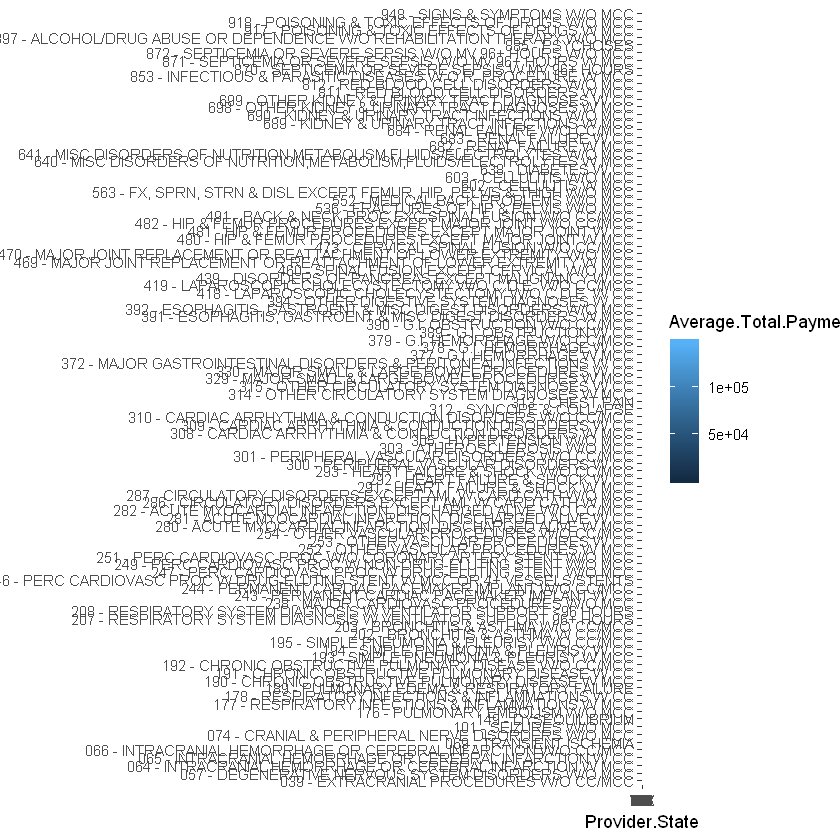

In [32]:
ggplot(med.data1, aes(Provider.State, DRG.Definition.copy))+
geom_raster(aes(fill=Average.Total.Payments))

## Applying KNN 